問題:
1. 預期超額報酬(f)?  => 用CAPM
2. V(共變異矩陣)中的rho(小p)該怎麼計算? sigma是標準差?  => rho自己查資料

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import random

In [43]:
#隨機生成波動率介於0.02~0.15的100組（股票）的收益率
def random_returns():
    days = 252
    samples = 100
    volatility = np.linspace(0.02, 0.15, 20)    # 每日收益率的標準差（波動率）

    random_returns = []
    for i in range(samples):
        stock_return = np.random.normal(0, random.choice(volatility), days)
        random_returns.append(stock_return)

    return np.array(random_returns)

In [44]:
def correlation_matrix(returns):
    return np.corrcoef(returns)

def standard_deviation_matrix(returns):
    std_list = []
    for stocks_return in returns:
        std_list.append(np.std(stocks_return))
    standard_deviation_matrix = np.zeros((100,100))
    np.fill_diagonal(standard_deviation_matrix, std_list)
    return standard_deviation_matrix

def V(returns):
    std_matrix = standard_deviation_matrix(returns)
    corr_matrix = correlation_matrix(returns)
    return np.dot(std_matrix, np.dot(corr_matrix, std_matrix))

In [45]:
returns = random_returns()
V = V(returns)


In [46]:
# #隨機生成V
# def random_V(size):
#     matrix_size = size
#     symmetric_matrix = np.zeros((matrix_size, matrix_size))

#     for i in range(matrix_size):
#         for j in range(i + 1, matrix_size):
#             value = np.random.uniform(-1, 1)
#             symmetric_matrix[i, j] = value
#             symmetric_matrix[j, i] = -value  

#     np.fill_diagonal(symmetric_matrix, 1)

#     return symmetric_matrix

In [47]:
# #隨機生成f
# def random_f(size):
#     f = np.random.rand(size)
#     return f

In [48]:
def get_variance_of_protfolio(V, N):
    avg_of_stocks_variance = np.sum([V[i, i] for i in range(min(V.shape))]) / N
    avg_of_stocks_covariance = np.sum([V[i, j] for i in range(min(V.shape)) for j in range(min(V.shape)) if i != j]) / (N * (N - 1) / 2)
    
    variance_of_protfolio = 1 / N * avg_of_stocks_variance + (N - 1) / N * avg_of_stocks_covariance
    SD = np.sqrt(variance_of_protfolio)

    return variance_of_protfolio

In [49]:
SD = []
components = []
for i in range(2, 101):
    SD.append(get_variance_of_protfolio(V, i))
    components.append(i)

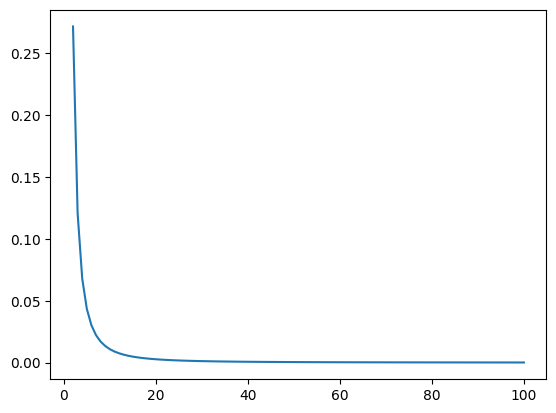

In [50]:
plt.plot(components, SD)